In [1]:
import pickle 
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

In [2]:
with open('curvature_output/dataset_GGNet_enhanced.pkl', 'rb') as f:
    enhanced_ggnet_dict = pickle.load(f)
    
features = enhanced_ggnet_dict['feature'].numpy()
feature_names = enhanced_ggnet_dict['feature_name']
nodes = enhanced_ggnet_dict['node_name']

enhanced_feature_df = pd.DataFrame(
    data = features,
    index = nodes,
    columns = feature_names
)
print(enhanced_feature_df[['ollivier_mean', 'ollivier_median', 'ollivier_max', 'ollivier_degree']].head())

          ollivier_mean  ollivier_median  ollivier_max  ollivier_degree
PAF1           0.379359         0.327455      0.358308        -0.314515
AEBP2          0.743790         0.783612      0.759910         1.180085
TBP            0.452754         0.443231      0.389147        -0.374959
RPS20          0.879205         0.859415      1.054096         1.421859
SNRNP200       0.922053         0.919761      0.933388         1.125136


In [5]:
print(enhanced_feature_df.columns)

Index(['MF: KIRC', 'MF: BRCA', 'MF: READ', 'MF: PRAD', 'MF: STAD', 'MF: HNSC',
       'MF: LUAD', 'MF: THCA', 'MF: BLCA', 'MF: ESCA', 'MF: LIHC', 'MF: UCEC',
       'MF: COAD', 'MF: LUSC', 'MF: CESC', 'MF: KIRP', 'METH: KIRC',
       'METH: BRCA', 'METH: READ', 'METH: PRAD', 'METH: STAD', 'METH: HNSC',
       'METH: LUAD', 'METH: THCA', 'METH: BLCA', 'METH: ESCA', 'METH: LIHC',
       'METH: UCEC', 'METH: COAD', 'METH: LUSC', 'METH: CESC', 'METH: KIRP',
       'GE: KIRC', 'GE: BRCA', 'GE: READ', 'GE: PRAD', 'GE: STAD', 'GE: HNSC',
       'GE: LUAD', 'GE: THCA', 'GE: BLCA', 'GE: ESCA', 'GE: LIHC', 'GE: UCEC',
       'GE: COAD', 'GE: LUSC', 'GE: CESC', 'GE: KIRP', 'ohnolog',
       'essentiality_percentage', 'essentiality_oneCellLine',
       'expressed_tissues_rnaseq', 'ppin_degree', 'ppin_hub',
       'ppin_betweenness', 'ppin_clustering', 'complexes', 'mirna',
       'ollivier_mean', 'ollivier_std', 'ollivier_min', 'ollivier_max',
       'ollivier_median', 'ollivier_degree', 'forman_m

DESCRIPTIVE STATISTICS FOR CURVATURE FEATURES

--- OLLIVIER CURVATURE ---
       ollivier_mean  ollivier_std  ollivier_min  ollivier_max  \
count   11183.000000  1.118300e+04  1.118300e+04  11183.000000   
mean        0.000000 -1.364463e-09  6.822315e-10      0.000000   
std         1.000046  1.000045e+00  1.000045e+00      1.000044   
min        -3.047935 -1.625695e+00 -3.938522e+00     -3.321568   
25%        -0.595452 -4.151884e-01 -6.536323e-01     -0.459302   
50%         0.404395 -6.741025e-02 -1.054903e-01      0.265752   
75%         0.691129  3.263392e-01  5.356627e-01      0.592654   
max        11.098572  2.284318e+01  1.250401e+01     10.875880   

       ollivier_median  ollivier_degree  
count     11183.000000     11183.000000  
mean          0.000000         0.000000  
std           1.000045         1.000042  
min          -4.157522        -0.605742  
25%          -0.603835        -0.523320  
50%           0.421551        -0.276051  
75%           0.684088         0.1388

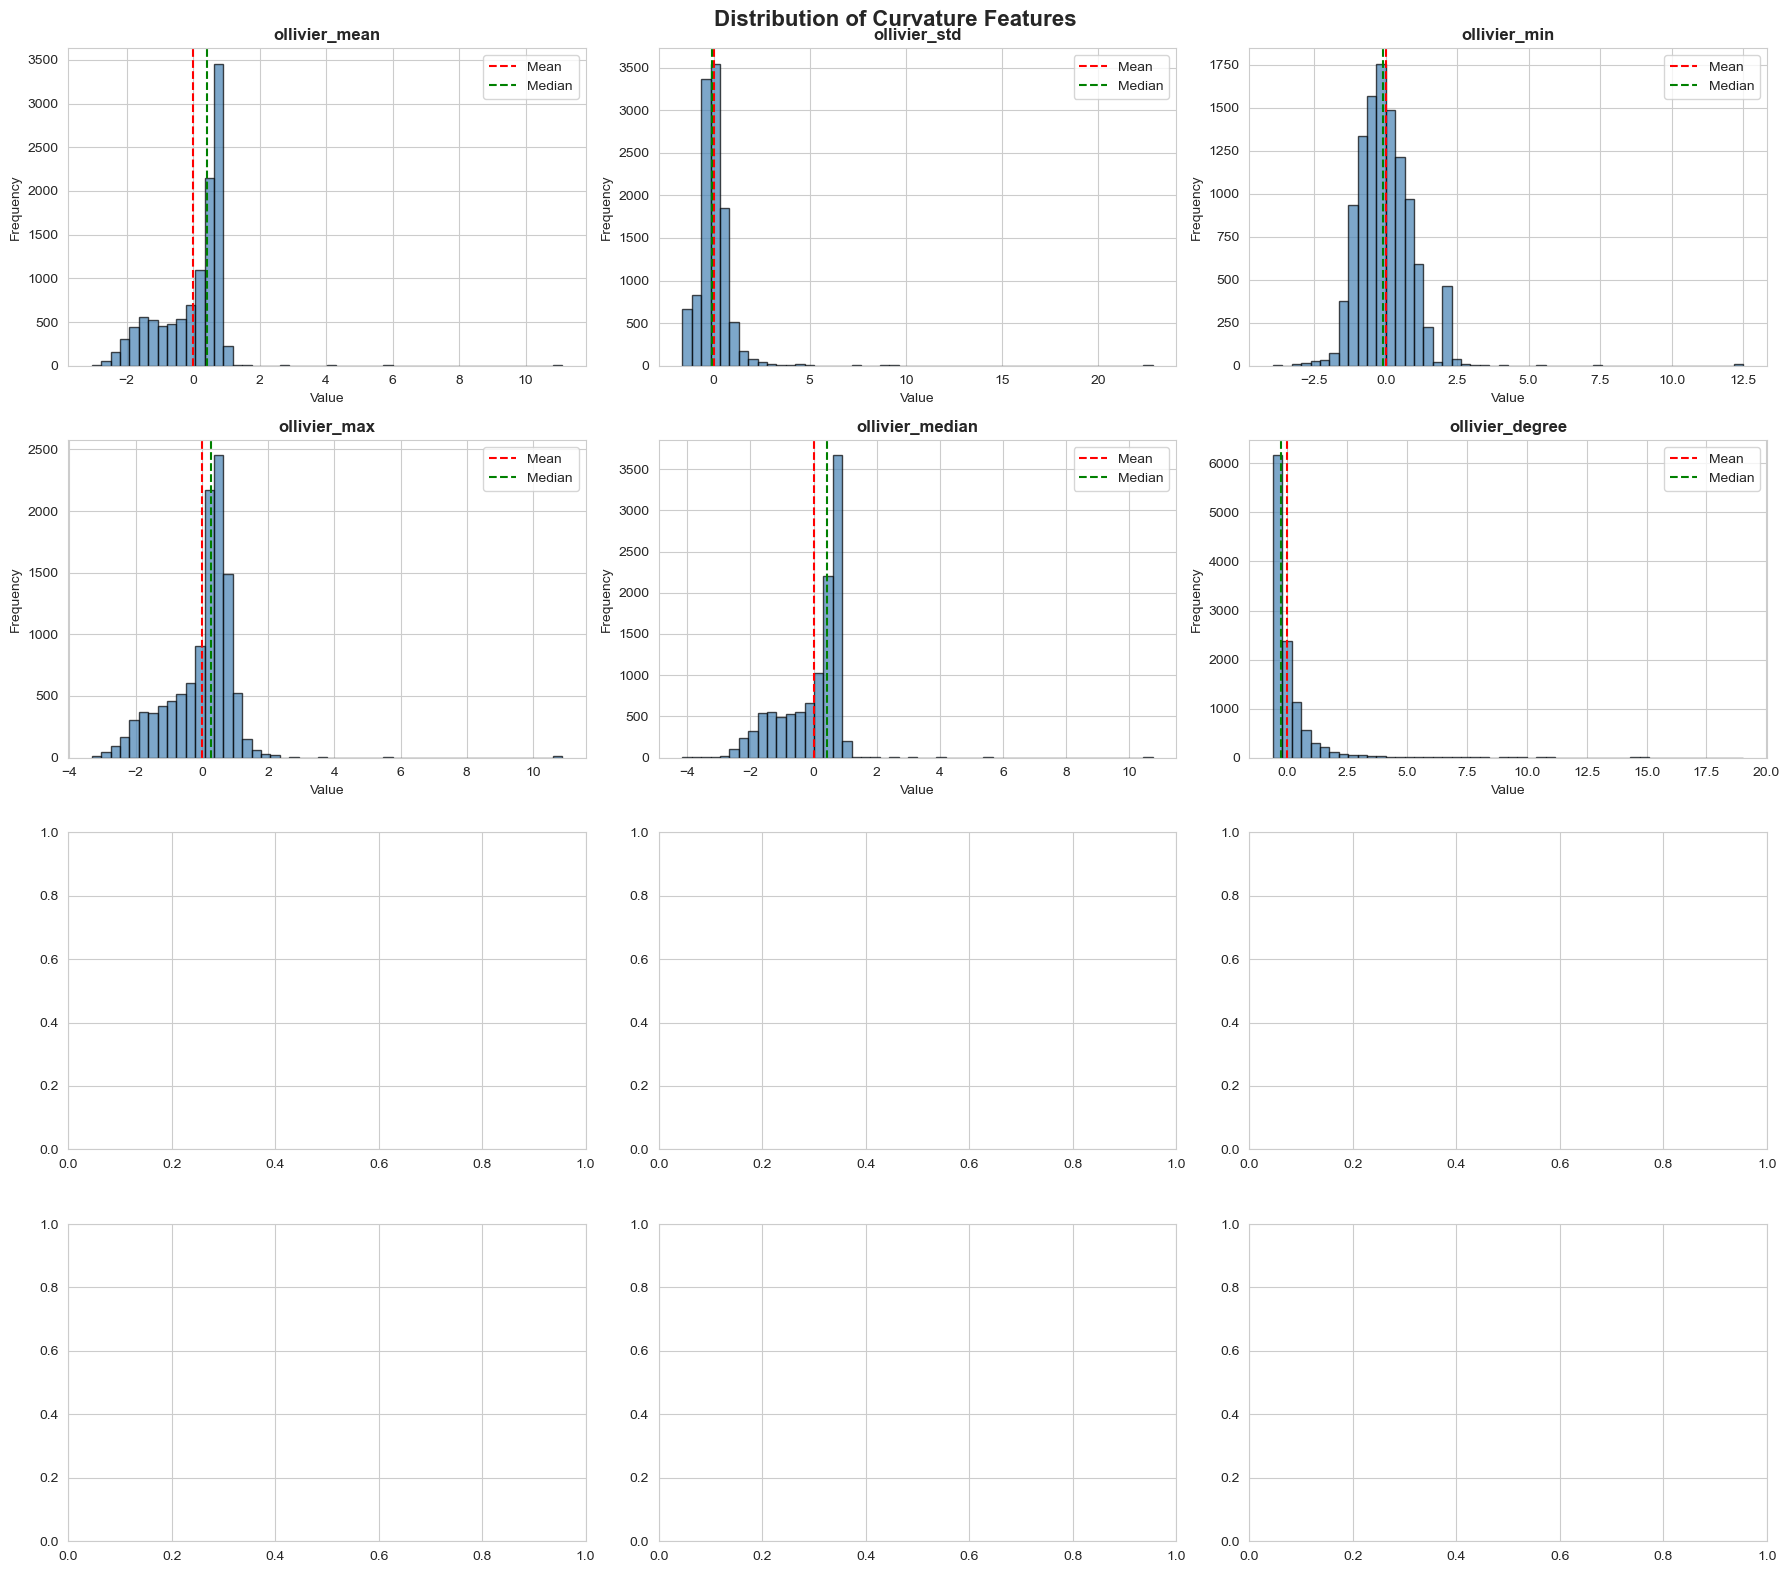

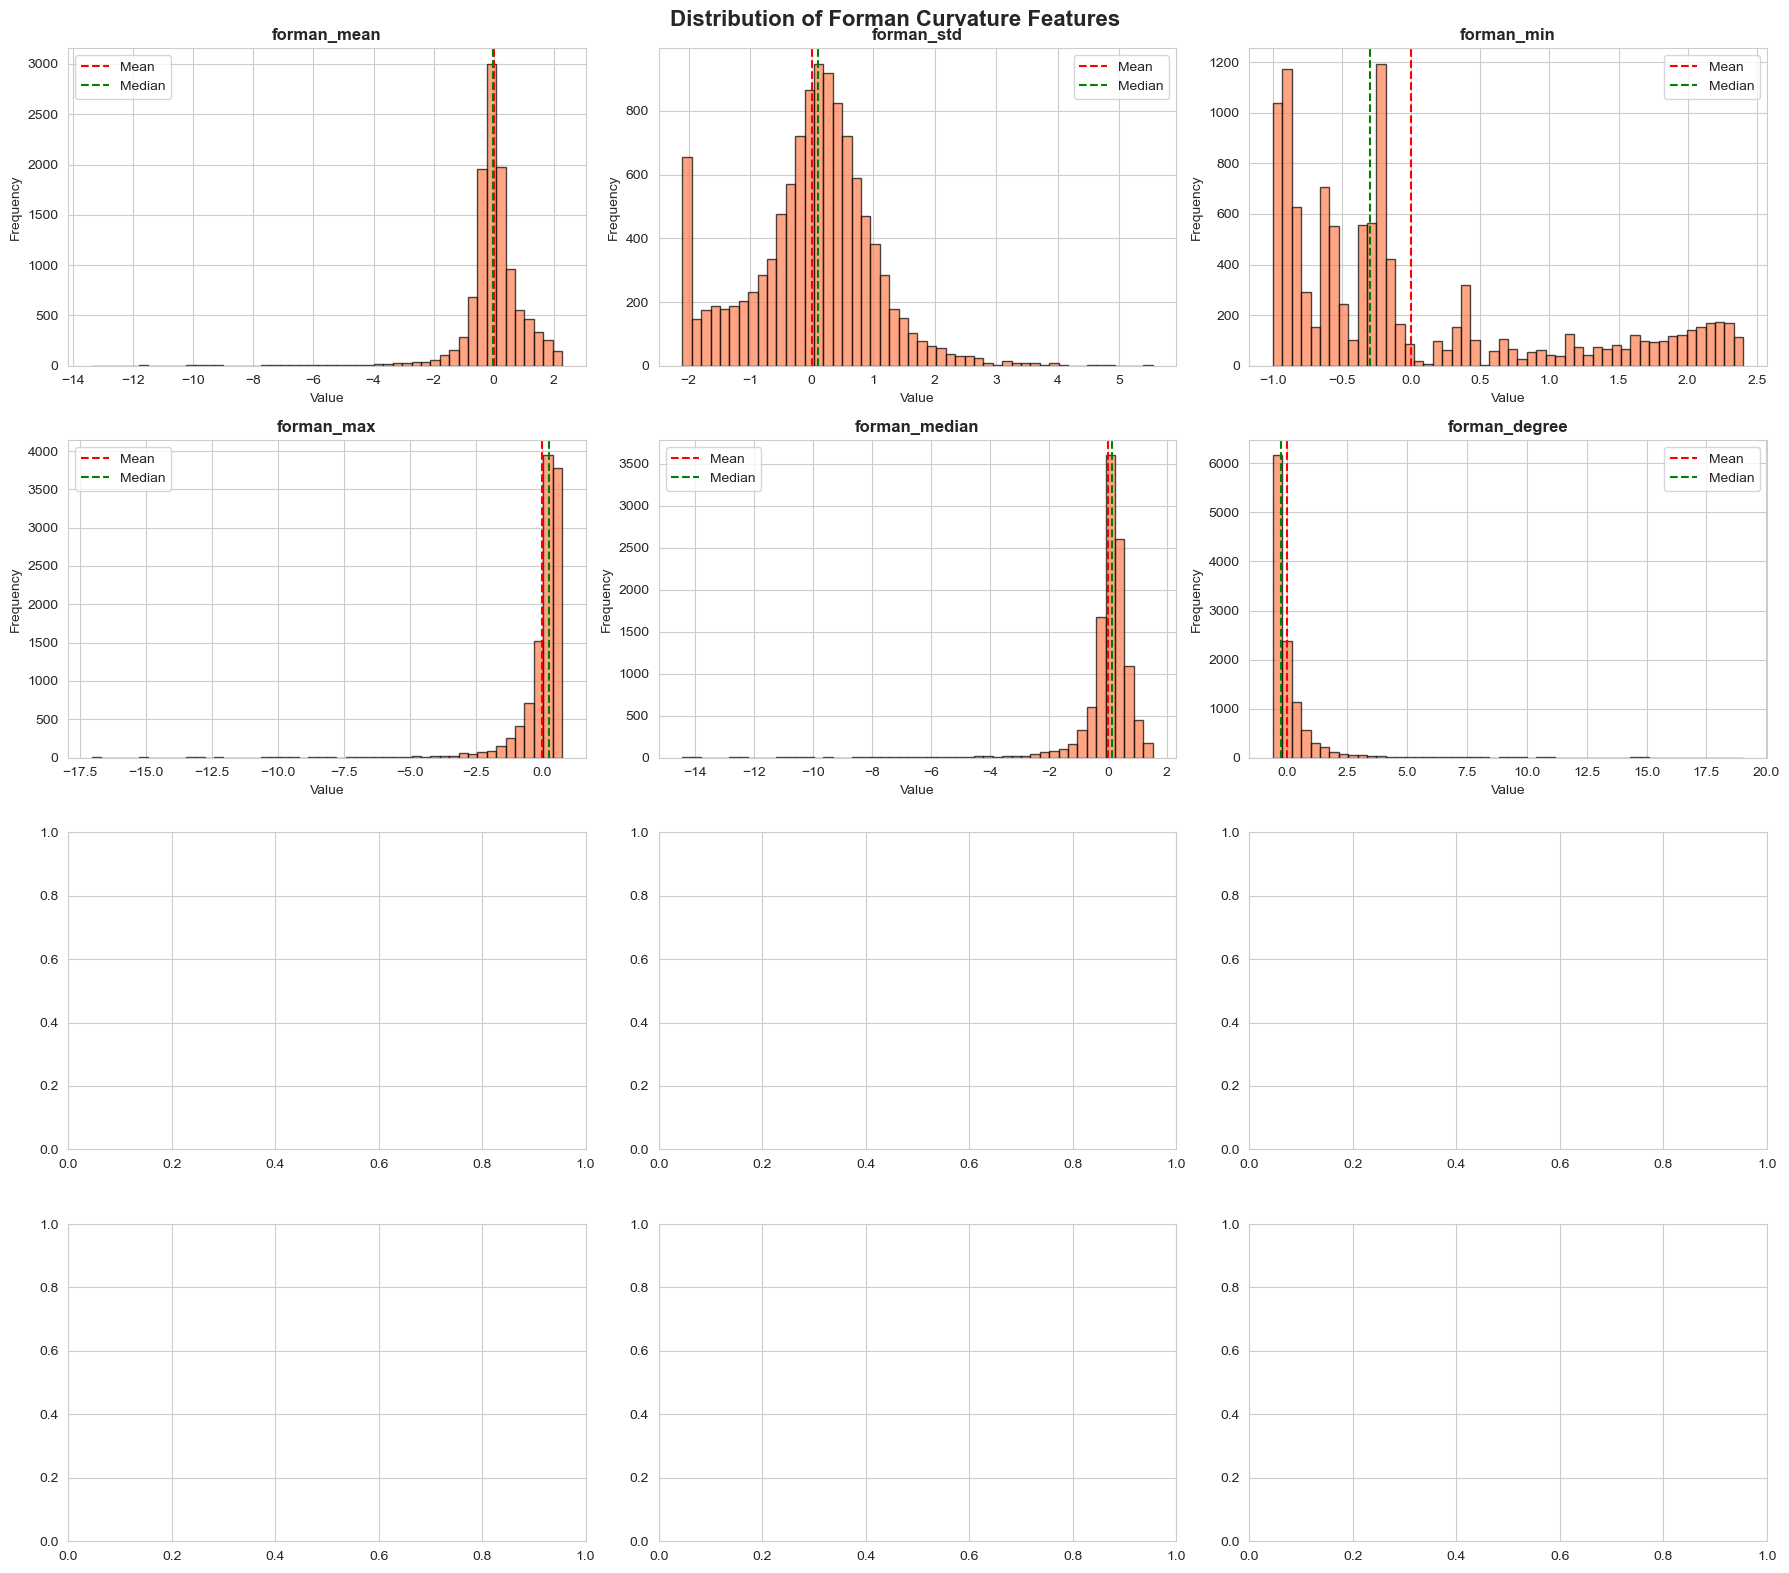

C:\Users\siddh\AppData\Local\Temp\ipykernel_86764\2802483031.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[col].dropna() for col in ollivier_cols],
C:\Users\siddh\AppData\Local\Temp\ipykernel_86764\2802483031.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df[col].dropna() for col in forman_cols],


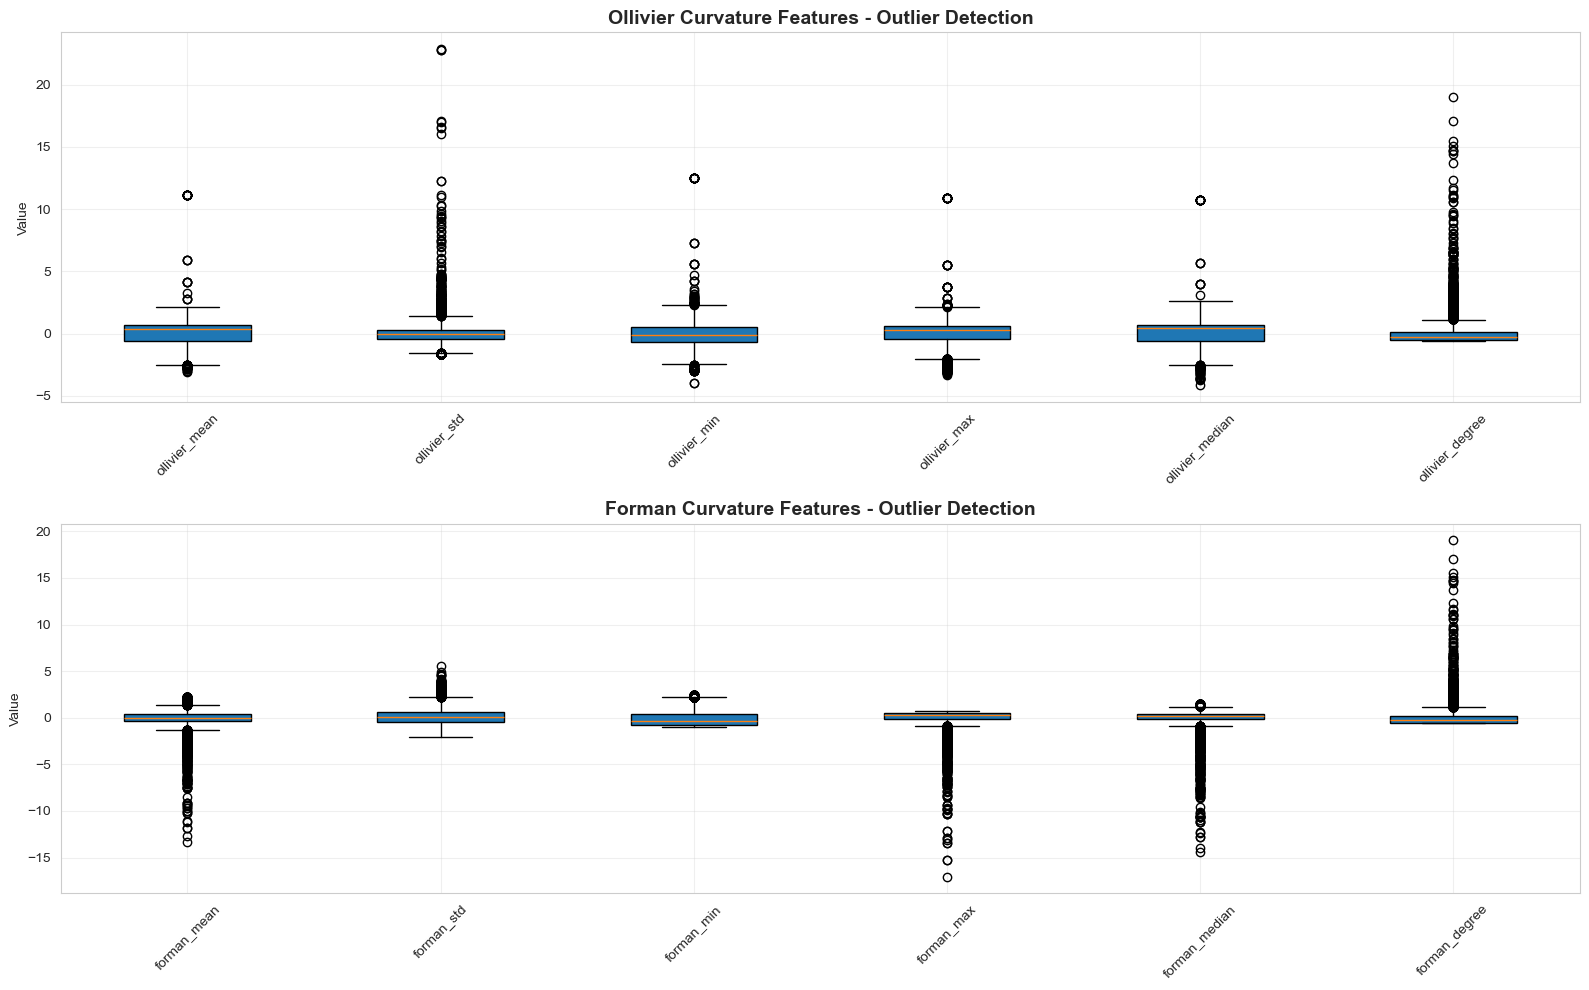


CORRELATION ANALYSIS

--- Ollivier Features Correlation ---
                 ollivier_mean  ollivier_std  ollivier_min  ollivier_max  \
ollivier_mean         1.000000     -0.158018      0.490136      0.943058   
ollivier_std         -0.158018      1.000000     -0.570340      0.118120   
ollivier_min          0.490136     -0.570340      1.000000      0.354356   
ollivier_max          0.943058      0.118120      0.354356      1.000000   
ollivier_median       0.995865     -0.173614      0.469188      0.927357   
ollivier_degree       0.384235      0.196183     -0.251854      0.488627   

                 ollivier_median  ollivier_degree  
ollivier_mean           0.995865         0.384235  
ollivier_std           -0.173614         0.196183  
ollivier_min            0.469188        -0.251854  
ollivier_max            0.927357         0.488627  
ollivier_median         1.000000         0.389248  
ollivier_degree         0.389248         1.000000  

--- Forman Features Correlation ---
     

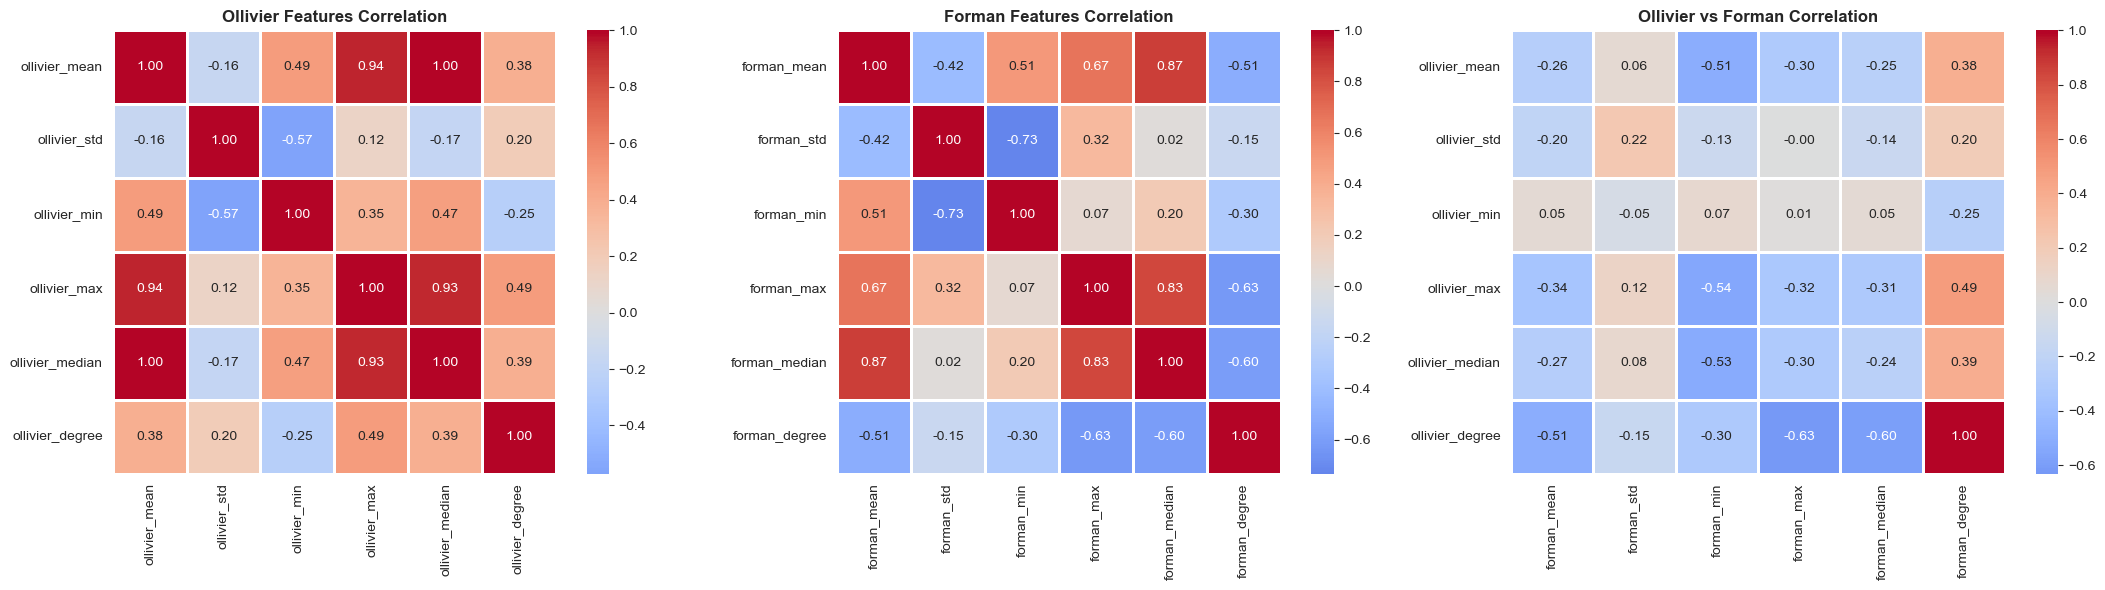

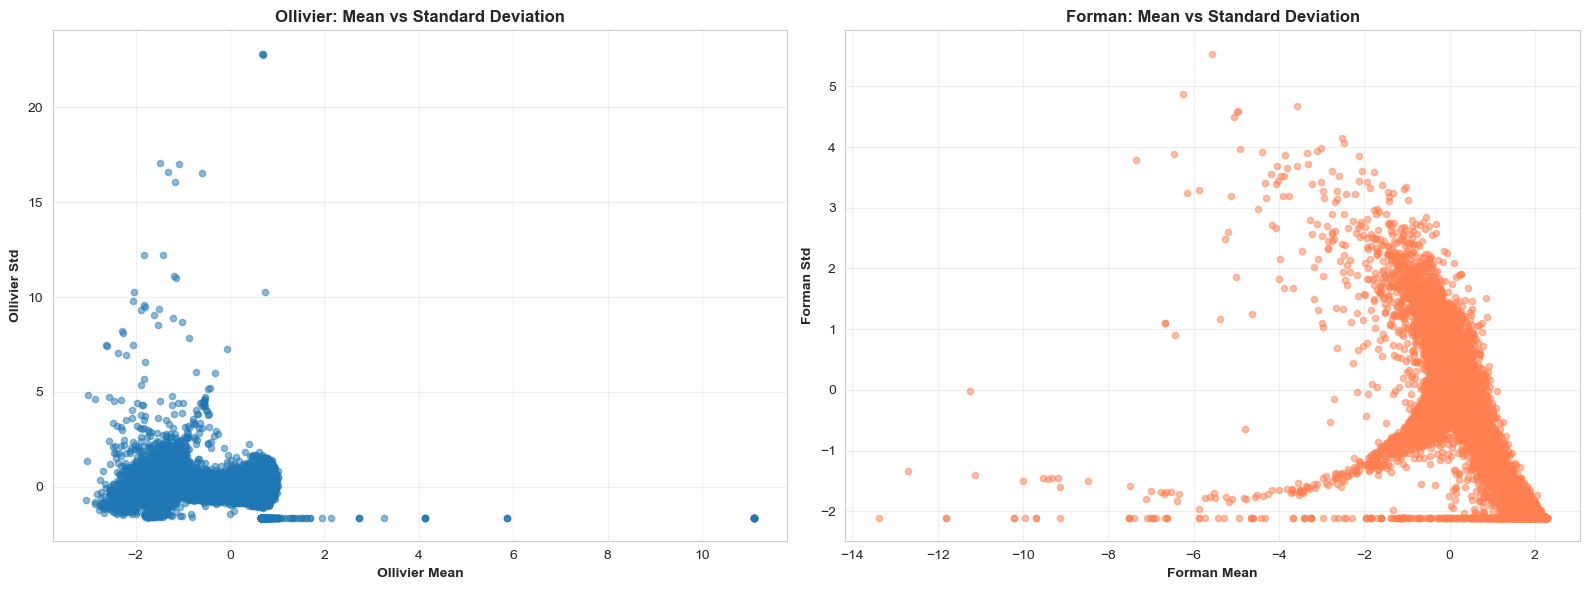

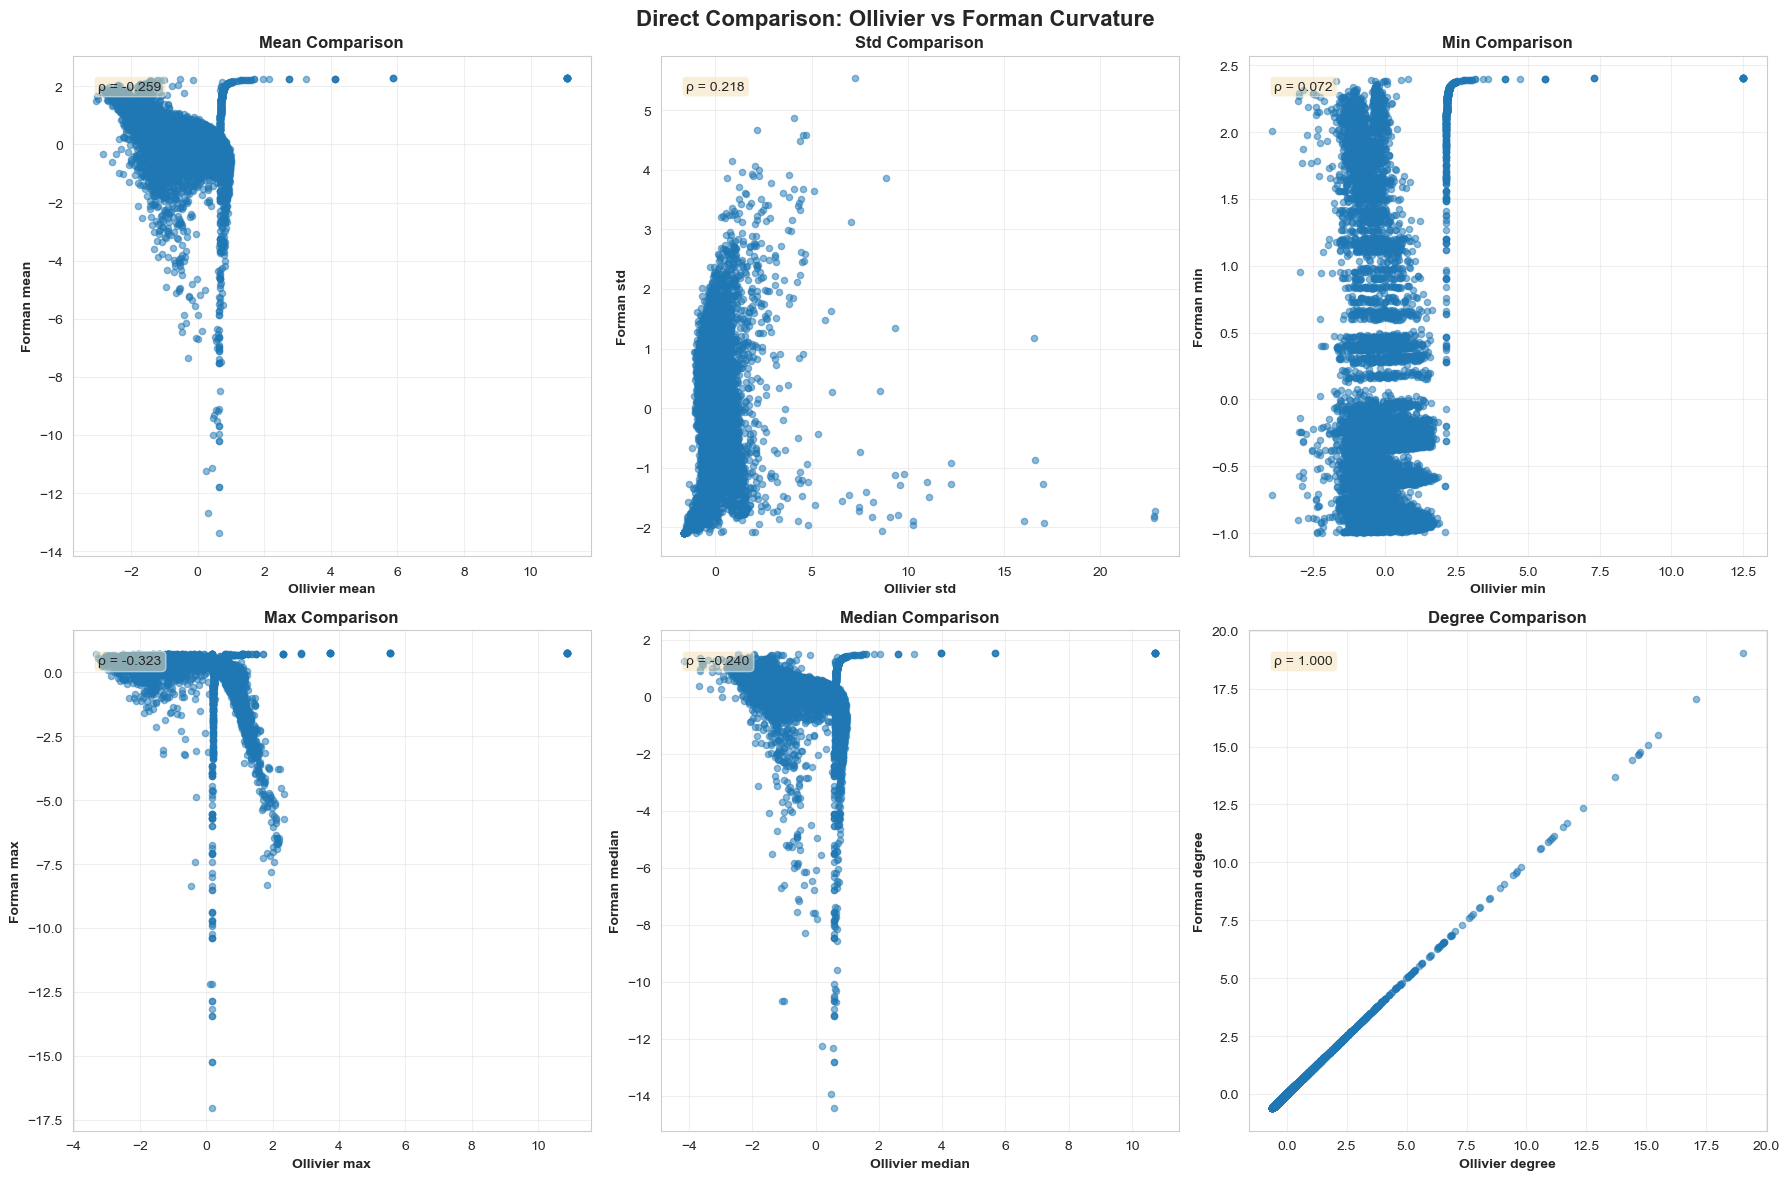


POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS

Positive Curvature Degree Stats:
count    1.118300e+04
mean     1.091570e-08
std      1.000037e+00
min     -5.194121e-01
25%     -5.194121e-01
50%     -5.119185e-01
75%      2.149621e-01
max      1.207735e+01
Name: positive_curvature_degree, dtype: float64

Negative Curvature Degree Stats:
count    1.118300e+04
mean    -2.728926e-09
std      1.000048e+00
min     -6.140366e-01
25%     -4.968537e-01
50%     -2.038965e-01
75%      2.648351e-01
max      3.202140e+01
Name: negative_curvature_degree, dtype: float64


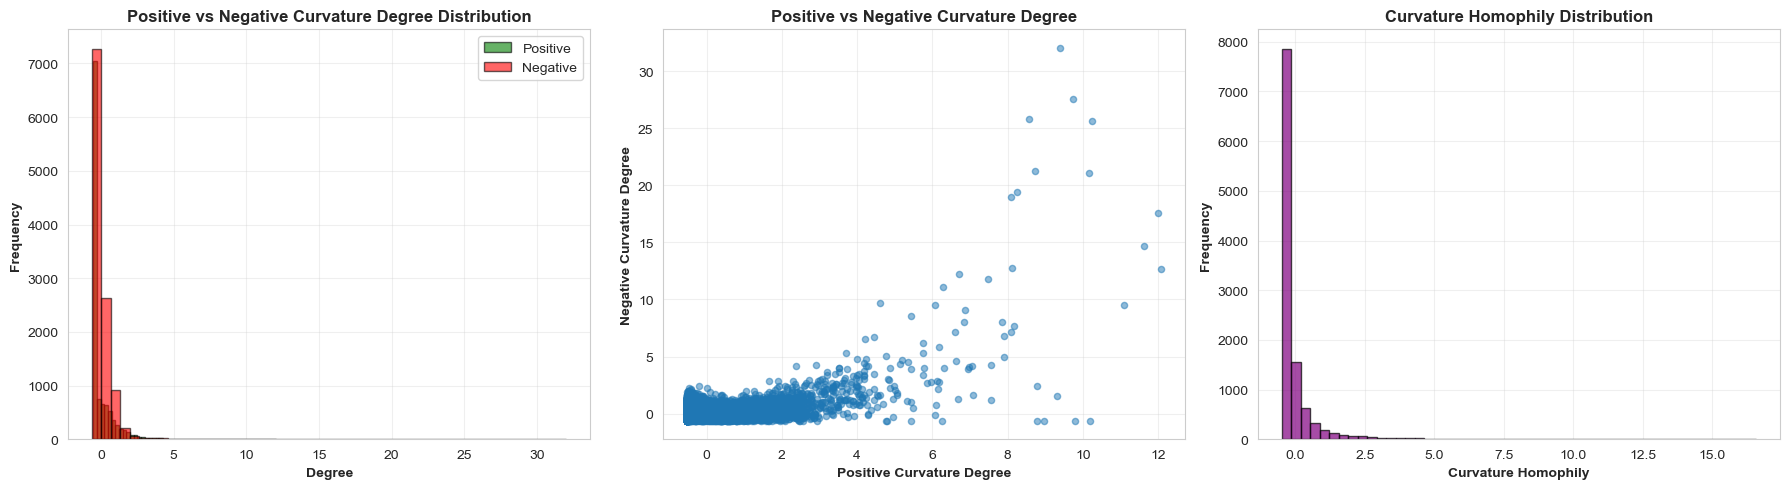


NORMALITY TESTS (Shapiro-Wilk)
ollivier_mean                  | Statistic: 0.8036 | p-value: 2.9954e-61 | Normal: False
ollivier_std                   | Statistic: 0.5760 | p-value: 1.2669e-76 | Normal: False
ollivier_min                   | Statistic: 0.8808 | p-value: 3.2528e-52 | Normal: False
ollivier_max                   | Statistic: 0.8580 | p-value: 2.7097e-55 | Normal: False
ollivier_median                | Statistic: 0.8074 | p-value: 6.9761e-61 | Normal: False
ollivier_degree                | Statistic: 0.5367 | p-value: 1.6404e-78 | Normal: False
forman_mean                    | Statistic: 0.7865 | p-value: 7.9360e-63 | Normal: False
forman_std                     | Statistic: 0.9695 | p-value: 2.4776e-31 | Normal: False
forman_min                     | Statistic: 0.8204 | p-value: 1.4355e-59 | Normal: False
forman_max                     | Statistic: 0.5430 | p-value: 3.2361e-78 | Normal: False
forman_median                  | Statistic: 0.6044 | p-value: 3.6165e-75 | Nor

In [8]:

import seaborn as sns
from scipy import stats

df = enhanced_feature_df.copy()

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load your data
# df = pd.read_csv('your_data.csv')

# Define curvature-related columns
ollivier_cols = ['ollivier_mean', 'ollivier_std', 'ollivier_min', 'ollivier_max', 
                 'ollivier_median', 'ollivier_degree']
forman_cols = ['forman_mean', 'forman_std', 'forman_min', 'forman_max', 
               'forman_median', 'forman_degree']
other_curvature_cols = ['positive_curvature_degree', 'negative_curvature_degree', 
                        'curvature_homophily']
all_curvature_cols = ollivier_cols + forman_cols + other_curvature_cols

# ============================================================================
# 1. BASIC STATISTICS
# ============================================================================
print("="*80)
print("DESCRIPTIVE STATISTICS FOR CURVATURE FEATURES")
print("="*80)

print("\n--- OLLIVIER CURVATURE ---")
print(df[ollivier_cols].describe())

print("\n--- FORMAN CURVATURE ---")
print(df[forman_cols].describe())

print("\n--- OTHER CURVATURE FEATURES ---")
print(df[other_curvature_cols].describe())

# ============================================================================
# 2. MISSING VALUES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_values = df[all_curvature_cols].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# ============================================================================
# 3. DISTRIBUTION PLOTS
# ============================================================================
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Curvature Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(ollivier_cols):
    row, col_idx = idx // 3, idx % 3
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col_idx].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Forman Curvature Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(forman_cols):
    row, col_idx = idx // 3, idx % 3
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col_idx].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 4. BOX PLOTS FOR OUTLIER DETECTION
# ============================================================================
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Ollivier boxplots
axes[0].boxplot([df[col].dropna() for col in ollivier_cols], 
                labels=ollivier_cols, patch_artist=True)
axes[0].set_title('Ollivier Curvature Features - Outlier Detection', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Forman boxplots
axes[1].boxplot([df[col].dropna() for col in forman_cols], 
                labels=forman_cols, patch_artist=True)
axes[1].set_title('Forman Curvature Features - Outlier Detection', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation within Ollivier features
print("\n--- Ollivier Features Correlation ---")
ollivier_corr = df[ollivier_cols].corr()
print(ollivier_corr)

# Correlation within Forman features
print("\n--- Forman Features Correlation ---")
forman_corr = df[forman_cols].corr()
print(forman_corr)

# Cross-correlation between Ollivier and Forman
print("\n--- Ollivier vs Forman Correlation ---")
cross_corr = df[ollivier_cols + forman_cols].corr().loc[ollivier_cols, forman_cols]
print(cross_corr)

# Correlation heatmap
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Ollivier heatmap
sns.heatmap(ollivier_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[0], square=True, linewidths=1)
axes[0].set_title('Ollivier Features Correlation', fontweight='bold', fontsize=12)

# Forman heatmap
sns.heatmap(forman_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[1], square=True, linewidths=1)
axes[1].set_title('Forman Features Correlation', fontweight='bold', fontsize=12)

# Cross-correlation heatmap
sns.heatmap(cross_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[2], linewidths=1)
axes[2].set_title('Ollivier vs Forman Correlation', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. SCATTER PLOTS: MEAN VS STD
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ollivier mean vs std
axes[0].scatter(df['ollivier_mean'], df['ollivier_std'], alpha=0.5, s=20)
axes[0].set_xlabel('Ollivier Mean', fontweight='bold')
axes[0].set_ylabel('Ollivier Std', fontweight='bold')
axes[0].set_title('Ollivier: Mean vs Standard Deviation', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Forman mean vs std
axes[1].scatter(df['forman_mean'], df['forman_std'], alpha=0.5, s=20, color='coral')
axes[1].set_xlabel('Forman Mean', fontweight='bold')
axes[1].set_ylabel('Forman Std', fontweight='bold')
axes[1].set_title('Forman: Mean vs Standard Deviation', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. COMPARING OLLIVIER VS FORMAN DIRECTLY
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Direct Comparison: Ollivier vs Forman Curvature', fontsize=16, fontweight='bold')

metrics = ['mean', 'std', 'min', 'max', 'median', 'degree']
for idx, metric in enumerate(metrics):
    row, col = idx // 3, idx % 3
    ollivier_col = f'ollivier_{metric}'
    forman_col = f'forman_{metric}'
    
    axes[row, col].scatter(df[ollivier_col], df[forman_col], alpha=0.5, s=20)
    axes[row, col].set_xlabel(f'Ollivier {metric}', fontweight='bold')
    axes[row, col].set_ylabel(f'Forman {metric}', fontweight='bold')
    axes[row, col].set_title(f'{metric.capitalize()} Comparison', fontweight='bold')
    
    # Add correlation coefficient
    corr_val = df[[ollivier_col, forman_col]].corr().iloc[0, 1]
    axes[row, col].text(0.05, 0.95, f'ρ = {corr_val:.3f}', 
                        transform=axes[row, col].transAxes, 
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS")
print("="*80)

print(f"\nPositive Curvature Degree Stats:")
print(df['positive_curvature_degree'].describe())

print(f"\nNegative Curvature Degree Stats:")
print(df['negative_curvature_degree'].describe())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution comparison
axes[0].hist(df['positive_curvature_degree'].dropna(), bins=50, alpha=0.6, 
             label='Positive', color='green', edgecolor='black')
axes[0].hist(df['negative_curvature_degree'].dropna(), bins=50, alpha=0.6, 
             label='Negative', color='red', edgecolor='black')
axes[0].set_xlabel('Degree', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Positive vs Negative Curvature Degree Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot
axes[1].scatter(df['positive_curvature_degree'], df['negative_curvature_degree'], 
                alpha=0.5, s=20)
axes[1].set_xlabel('Positive Curvature Degree', fontweight='bold')
axes[1].set_ylabel('Negative Curvature Degree', fontweight='bold')
axes[1].set_title('Positive vs Negative Curvature Degree', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Curvature homophily distribution
axes[2].hist(df['curvature_homophily'].dropna(), bins=50, 
             edgecolor='black', alpha=0.7, color='purple')
axes[2].set_xlabel('Curvature Homophily', fontweight='bold')
axes[2].set_ylabel('Frequency', fontweight='bold')
axes[2].set_title('Curvature Homophily Distribution', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 9. NORMALITY TESTS
# ============================================================================
print("\n" + "="*80)
print("NORMALITY TESTS (Shapiro-Wilk)")
print("="*80)

for col in all_curvature_cols:
    data_clean = df[col].dropna()
    if len(data_clean) > 3:
        # Sample if too large (Shapiro-Wilk has limitations)
        if len(data_clean) > 5000:
            data_clean = data_clean.sample(5000, random_state=42)
        stat, p_value = stats.shapiro(data_clean)
        print(f"{col:30s} | Statistic: {stat:.4f} | p-value: {p_value:.4e} | Normal: {p_value > 0.05}")

# ============================================================================
# 10. SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "="*80)
print("SUMMARY COMPARISON: OLLIVIER VS FORMAN")
print("="*80)

summary_data = []
for metric in ['mean', 'std', 'min', 'max', 'median']:
    ollivier_col = f'ollivier_{metric}'
    forman_col = f'forman_{metric}'
    
    summary_data.append({
        'Metric': metric.upper(),
        'Ollivier Mean': df[ollivier_col].mean(),
        'Ollivier Std': df[ollivier_col].std(),
        'Forman Mean': df[forman_col].mean(),
        'Forman Std': df[forman_col].std(),
        'Correlation': df[[ollivier_col, forman_col]].corr().iloc[0, 1]
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("EDA COMPLETE!")
print("="*80)